### 数字图像领域的应用

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32418 (\N{CJK UNIFIED IDEOGRAPH-7EA2}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36890 (\N{CJK UNIFIED IDEOGRAPH-901A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36947 (\N{CJK UNIFIED IDEOGRAPH-9053}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32511 (\N{CJK UNIFIED IDEOGRAPH-7EFF}) missing from current font.
  fig.canvas.print_figure(bytes_

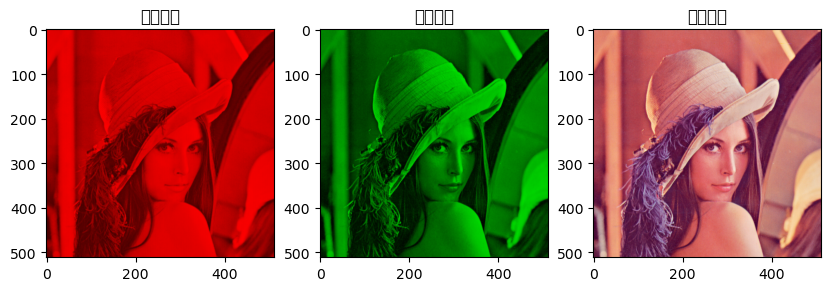

In [22]:
# 图像加载与通道分离
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 加载彩色图像
img = np.array(Image.open("./pic/lena.png"))  # 形状：(H, W, 3)

# 分离RGB通道
red_channel = img.copy()
red_channel[:, :, [1,2]] = 0  # 保留红色通道

green_channel = img.copy()
green_channel[:, :, [0,2]] = 0

plt.figure(figsize=(10,4))
plt.subplot(131); plt.imshow(red_channel); plt.title("红色通道")
plt.subplot(132); plt.imshow(green_channel); plt.title("绿色通道")
plt.subplot(133); plt.imshow(img); plt.title("原始图像")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 28784 (\N{CJK UNIFIED IDEOGRAPH-7070}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from current font.
  fig.canvas.print_figure(bytes_

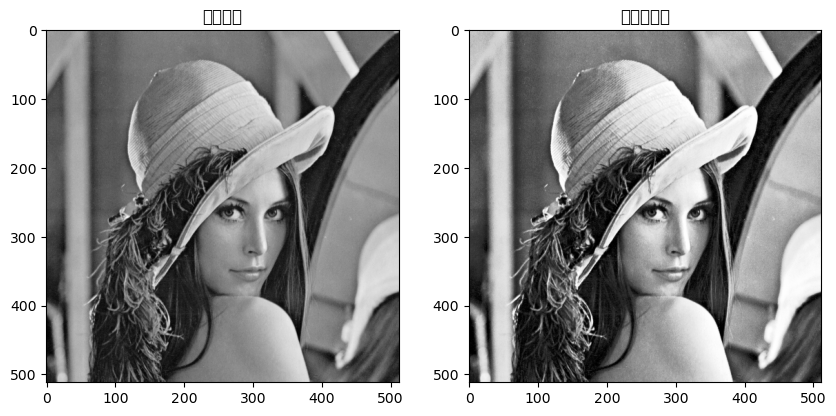

In [23]:
# 2. 图像灰度化与直方图均衡化
# 灰度化（加权平均法）
gray_img = np.dot(img[..., :3], [0.2989, 0.5870, 0.1140]).astype(np.uint8)

# 直方图均衡化
hist, bins = np.histogram(gray_img.flatten(), 256, [0,256])
cdf = hist.cumsum()
cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
equalized = cdf_normalized[gray_img].astype(np.uint8)

# 可视化对比
plt.figure(figsize=(10,5))
plt.subplot(121); plt.imshow(gray_img, cmap='gray'); plt.title("原始灰度")
plt.subplot(122); plt.imshow(equalized, cmap='gray'); plt.title("均衡化结果")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31946 (\N{CJK UNIFIED IDEOGRAPH-7CCA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24425 (\N{CJK UNIFIED IDEOGRAPH-5F69}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


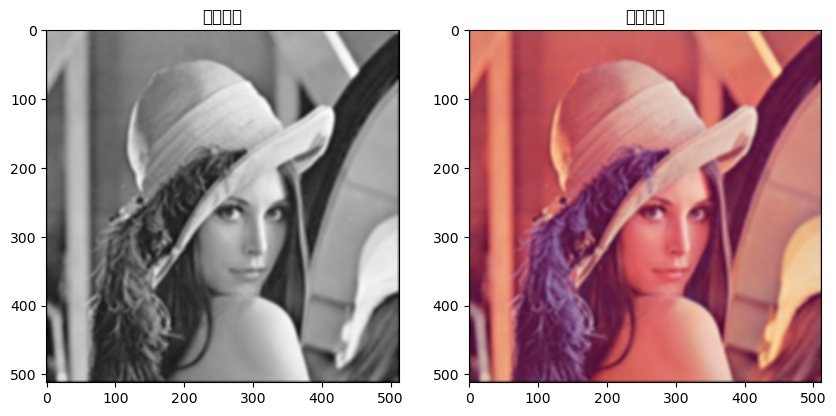

In [24]:
# 高斯模糊滤波
from scipy.signal import convolve2d

def gaussian_kernel(size=5, sigma=1.0):
    x = np.linspace(-sigma, sigma, size)
    kernel_1d = np.exp(-x**2/(2*sigma**2))
    kernel_2d = np.outer(kernel_1d, kernel_1d)
    return kernel_2d / kernel_2d.sum()

# 单通道模糊处理
gray_blurred = convolve2d(gray_img, gaussian_kernel(7, 2), mode='same')

# 三通道模糊处理（保持颜色）
color_blurred = np.stack([
    convolve2d(img[:,:,c], gaussian_kernel(7,2), mode='same') 
    for c in range(3)
], axis=2).clip(0,255).astype(np.uint8)

plt.figure(figsize=(10,5))
plt.subplot(121); plt.imshow(gray_blurred, cmap='gray'); plt.title("灰度模糊")
plt.subplot(122); plt.imshow(color_blurred); plt.title("彩色模糊")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25289 (\N{CJK UNIFIED IDEOGRAPH-62C9}) missing from current font.
  fig.canvas.print_figure(bytes_

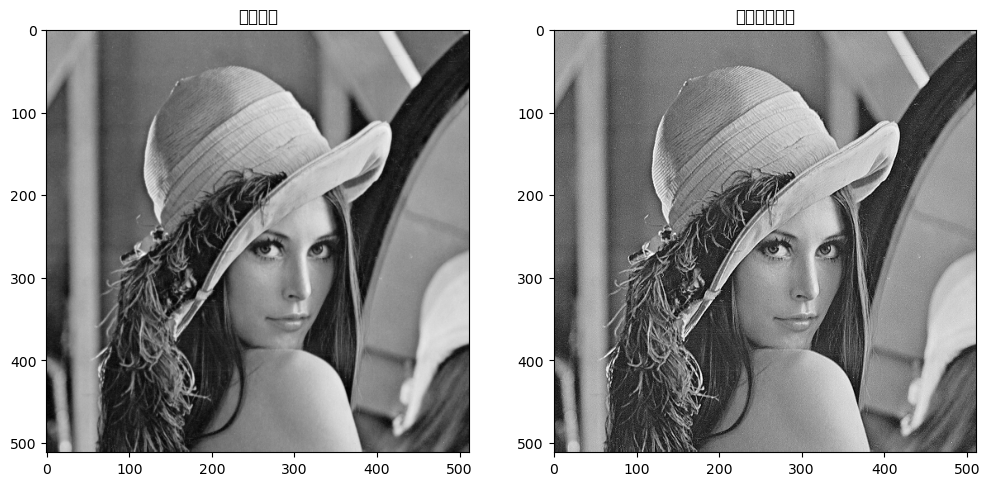

In [3]:
#拉普拉斯锐化：通过增强图像中的高频边缘实现图像锐化

import numpy as np
from scipy.signal import convolve2d
from PIL import Image
import matplotlib.pyplot as plt

# 加载图像并转为灰度
image = np.array(Image.open("./pic/lena.png").convert('L'))  # 灰度图像

# 定义拉普拉斯锐化核
laplacian_kernel = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

# 应用卷积（边缘处理：填充边界）
sharpened = convolve2d(image, laplacian_kernel, mode='same', boundary='symm')

# 将结果叠加到原图（调整锐化强度）
alpha = 0.5  # 锐化强度系数
sharpened_image = np.clip(image + alpha * sharpened, 0, 255).astype(np.uint8)

# 可视化
plt.figure(figsize=(12, 6))
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title("原始图像")
plt.subplot(122), plt.imshow(sharpened_image, cmap='gray'), plt.title("拉普拉斯锐化")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 26799 (\N{CJK UNIFIED IDEOGRAPH-68AF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24133 (\N{CJK UNIFIED IDEOGRAPH-5E45}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 36793 (\N{CJK UNIFIED IDEOGRAPH-8FB9}) missing from current font.
  fig.canvas.print_figure(bytes_

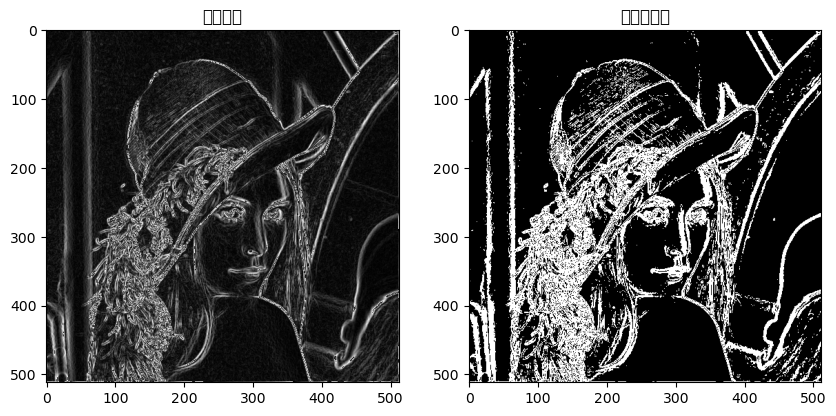

In [25]:
# 边缘检测（sobel算子）
# Sobel算子定义
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

# 计算梯度
grad_x = convolve2d(gray_img, sobel_x, mode='same')
grad_y = convolve2d(gray_img, sobel_y, mode='same')
grad_magnitude = np.sqrt(grad_x**2 + grad_y**2).astype(np.uint8)

# 结果阈值化
edges = (grad_magnitude > 50).astype(np.uint8) * 255

plt.figure(figsize=(10,5))
plt.subplot(121); plt.imshow(grad_magnitude, cmap='gray'); plt.title("梯度幅值")
plt.subplot(122); plt.imshow(edges, cmap='gray'); plt.title("二值化边缘")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33192 (\N{CJK UNIFIED IDEOGRAPH-81A8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32960 (\N{CJK UNIFIED IDEOGRAPH-80C0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33104 (\N{CJK UNIFIED IDEOGRAPH-8150}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 34432 (\N{CJK UNIFIED IDEOGRAPH-8680}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


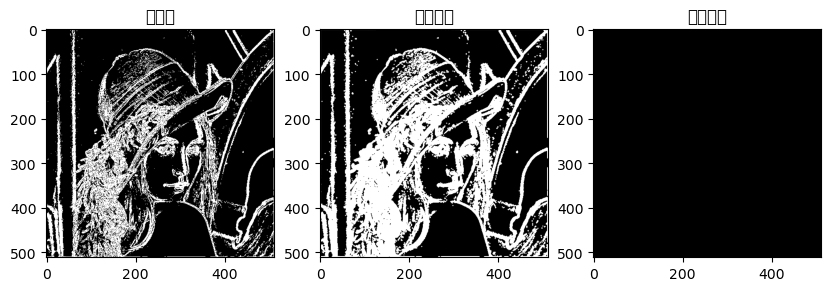

In [26]:
#形态学操作（膨胀/腐蚀）
def morphological_operation(image, kernel, operation='dilation'):
    result = np.zeros_like(image)
    pad = kernel.shape[0] // 2
    padded = np.pad(image, pad, mode='constant')
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded[i:i+2*pad+1, j:j+2*pad+1]
            if operation == 'dilation':
                result[i,j] = np.max(region * kernel)
            elif operation == 'erosion':
                result[i,j] = np.min(region * (kernel > 0))
    return result

# 创建结构元素
kernel = np.array([[0,1,0], [1,1,1], [0,1,0]])

# 处理二值图像
dilated = morphological_operation(edges, kernel, 'dilation')
eroded = morphological_operation(edges, kernel, 'erosion')

plt.figure(figsize=(10,5))
plt.subplot(131); plt.imshow(edges, cmap='gray'); plt.title("原边缘")
plt.subplot(132); plt.imshow(dilated, cmap='gray'); plt.title("膨胀结果")
plt.subplot(133); plt.imshow(eroded, cmap='gray'); plt.title("腐蚀结果")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20223 (\N{CJK UNIFIED IDEOGRAPH-4EFF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 23556 (\N{CJK UNIFIED IDEOGRAPH-5C04}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21464 (\N{CJK UNIFIED IDEOGRAPH-53D8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25442 (\N{CJK UNIFIED IDEOGRAPH-6362}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


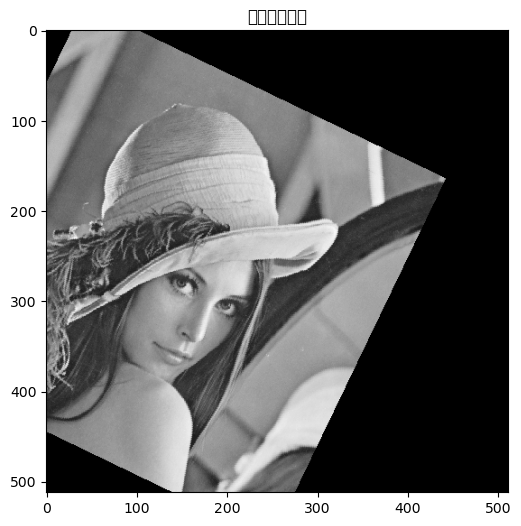

In [27]:
# 图像仿射
def affine_transform(image, matrix):
    H, W = image.shape[:2]
    coords = np.mgrid[0:H, 0:W].reshape(2, -1)
    homog_coords = np.vstack([coords, np.ones(coords.shape[1])])
    transformed = matrix @ homog_coords
    new_coords = transformed[:2].astype(int)
    
    # 处理越界坐标
    mask = (new_coords[0] >= 0) & (new_coords[0] < H) & (new_coords[1] >= 0) & (new_coords[1] < W)
    result = np.zeros_like(image)
    result[coords[0][mask], coords[1][mask]] = image[new_coords[0][mask], new_coords[1][mask]]
    return result

# 旋转30度 + 缩放
theta = np.radians(30)
matrix = np.array([
    [1.2*np.cos(theta), -np.sin(theta), 50],
    [np.sin(theta), 1.2*np.cos(theta), -30]
])

transformed_img = affine_transform(gray_img, matrix)

plt.figure(figsize=(6,6))
plt.imshow(transformed_img, cmap='gray')
plt.title("仿射变换结果")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20809 (\N{CJK UNIFIED IDEOGRAPH-5149}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22686 (\N{CJK UNIFIED IDEOGRAPH-589E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24378 (\N{CJK UNIFIED IDEOGRAPH-5F3A}) missing from current font.
  fig.canvas.print_figure(bytes_

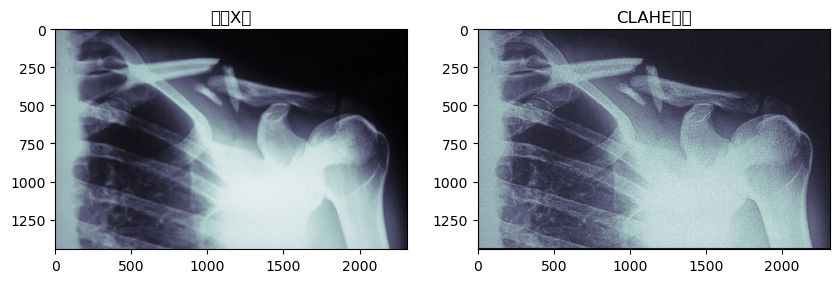

In [28]:
# 医学图像增强技术之CLAHE(Contrast Limited Adaptive Histogram Equalization)
def clahe(image, clip_limit=2.0, tile_size=8):
    # 分块处理
    h, w = image.shape
    tiles_y = h // tile_size
    tiles_x = w // tile_size
    
    # 计算每个tile的直方图
    output = np.zeros_like(image)
    for i in range(tiles_y):
        for j in range(tiles_x):
            tile = image[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size]
            hist = np.histogram(tile, 256, [0,256])[0]
            clip_threshold = clip_limit * tile_size**2 / 256
            excess = np.sum(np.maximum(hist - clip_threshold, 0))
            hist = np.minimum(hist, clip_threshold) + excess / 256
            cdf = hist.cumsum()
            cdf = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())
            output[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size] = cdf[tile]
    return output

# 处理X光图像
xray = np.array(Image.open("./pic/x-ray.jpg").convert('L'))
enhanced = clahe(xray, clip_limit=3.0)

plt.figure(figsize=(10,5))
plt.subplot(121); plt.imshow(xray, cmap='bone'); plt.title("原始X光")
plt.subplot(122); plt.imshow(enhanced, cmap='bone'); plt.title("CLAHE增强")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\ProgramData\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_102436\1291726793.py:7: RuntimeWarning: overflow encountered in scalar multiply
  threshold = np.argmax([np.sum(pixel_values < t) * np.sum(pixel_values >= t) *
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20108 (\N{CJK UNIFIED IDEOGRAPH-4E8C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\cor

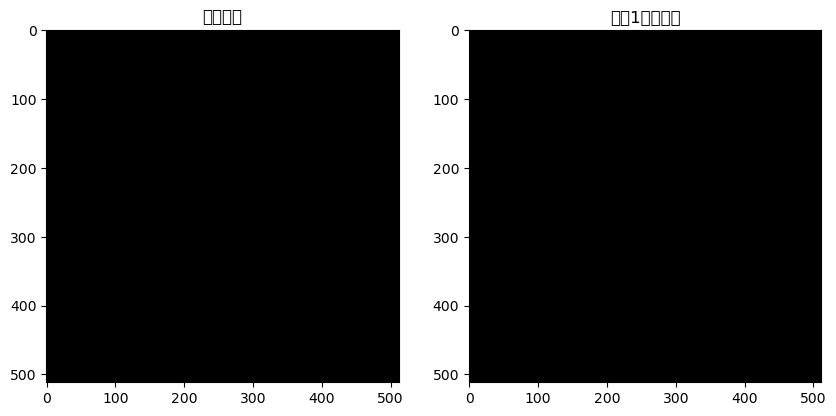

In [30]:
from scipy import ndimage

gray_img =  np.array(Image.open("./pic/lena.png").convert('L'))  # 灰度图像

# 大津法自动阈值
pixel_values = gray_img.flatten()
threshold = np.argmax([np.sum(pixel_values < t) * np.sum(pixel_values >= t) * 
                      (np.mean(pixel_values[pixel_values < t]) - np.mean(pixel_values >= t))**2 
                      for t in range(256)])

# 二值化与连通域标记
binary = (gray_img > threshold).astype(int)
labels, num_features = ndimage.label(binary)

# 可视化染色
plt.figure(figsize=(10,5))
plt.subplot(121); plt.imshow(binary, cmap='gray'); plt.title("二值分割")
plt.subplot(122); plt.imshow(labels, cmap='nipy_spectral'); plt.title(f"发现{num_features}个连通域")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 27169 (\N{CJK UNIFIED IDEOGRAPH-6A21}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 31946 (\N{CJK UNIFIED IDEOGRAPH-7CCA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38750 (\N{CJK UNIFIED IDEOGRAPH-975E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 25513 (\N{CJK UNIFIED IDEOGRAPH-63A9}) missing from current font.
  fig.canvas.print_figure(bytes_

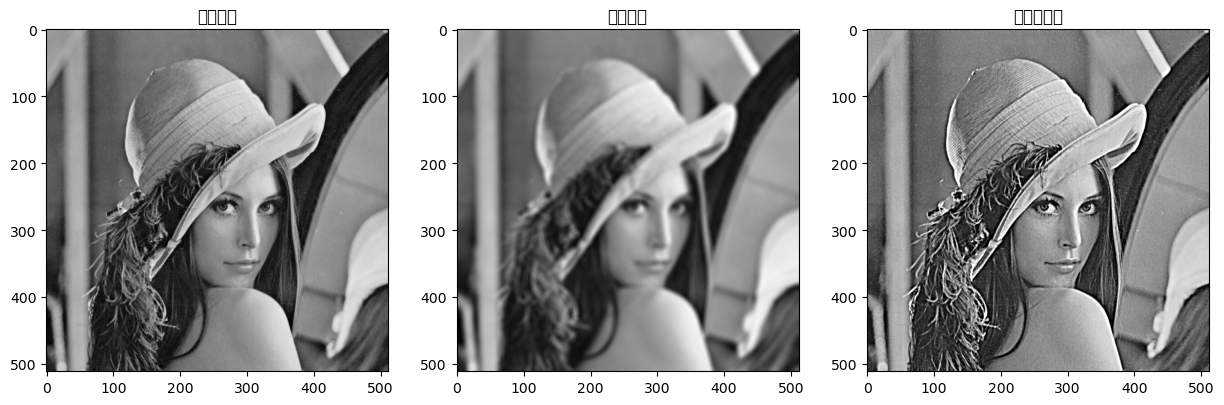

In [4]:
#非锐化掩膜：通过增强原图与模糊化图像的差异来突出图像细节

# 高斯模糊函数（用于生成掩模）
def gaussian_blur(img, kernel_size=5, sigma=1.0):
    x = np.linspace(-sigma, sigma, kernel_size)
    kernel_1d = np.exp(-x**2/(2*sigma**2))
    kernel_2d = np.outer(kernel_1d, kernel_1d)
    kernel_2d /= kernel_2d.sum()
    return convolve2d(img, kernel_2d, mode='same', boundary='symm')

# 生成模糊版本
blurred = gaussian_blur(image, kernel_size=9, sigma=2.0)

# 计算掩模（原图 - 模糊图）
mask = image - blurred

# 增强细节
amount = 1.5  # 增强系数
sharpened_um = np.clip(image + amount * mask, 0, 255).astype(np.uint8)

# 可视化对比
plt.figure(figsize=(15, 5))
plt.subplot(131), plt.imshow(image, cmap='gray'), plt.title("原始图像")
plt.subplot(132), plt.imshow(blurred, cmap='gray'), plt.title("高斯模糊")
plt.subplot(133), plt.imshow(sharpened_um, cmap='gray'), plt.title("非锐化掩模")
plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24425 (\N{CJK UNIFIED IDEOGRAPH-5F69}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 33394 (\N{CJK UNIFIED IDEOGRAPH-8272}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 38160 (\N{CJK UNIFIED IDEOGRAPH-9510}) missing from current font.
  fig.canvas.print_figure(bytes_

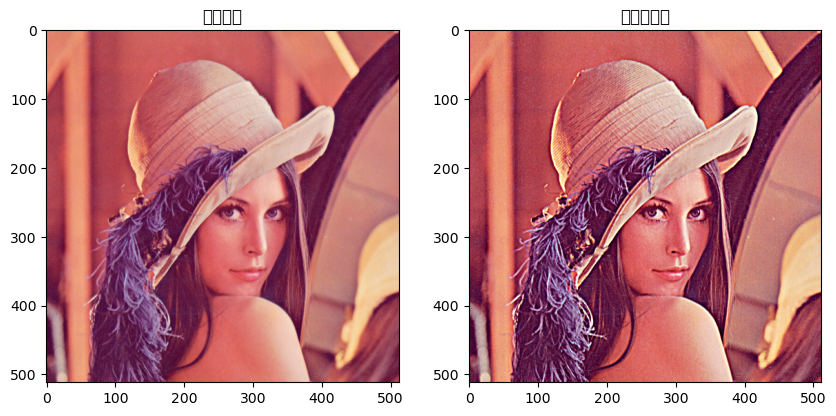

In [5]:
# 高级应用：彩色图像锐化
# 加载彩色图像
color_img = np.array(Image.open("./pic/lena.png"))  # 形状：(H, W, 3)

# 对每个通道分别处理
sharpened_channels = []
for c in range(3):
    channel = color_img[:, :, c]
    blurred = gaussian_blur(channel, kernel_size=9, sigma=2.0)
    mask = channel - blurred
    sharpened = np.clip(channel + 1.2 * mask, 0, 255)
    sharpened_channels.append(sharpened)

sharpened_color = np.stack(sharpened_channels, axis=2).astype(np.uint8)

# 可视化
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(color_img), plt.title("原始彩色")
plt.subplot(122), plt.imshow(sharpened_color), plt.title("锐化后彩色")
plt.show()

In [6]:
# 锐化效果评估指标
# 边缘梯度能量
def gradient_energy(img):
    gy, gx = np.gradient(img.astype(float))
    return np.sqrt(gx**2 + gy**2).mean()

print("原始图像梯度能量:", gradient_energy(image))
print("锐化后梯度能量:", gradient_energy(sharpened_image))


原始图像梯度能量: 6.834930982803093
锐化后梯度能量: 12.873220221306777


c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 32032 (\N{CJK UNIFIED IDEOGRAPH-7D20}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 20998 (\N{CJK UNIFIED IDEOGRAPH-5206}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24067 (\N{CJK UNIFIED IDEOGRAPH-5E03}) missing from current font.
  fig.canvas.print_figure(bytes_

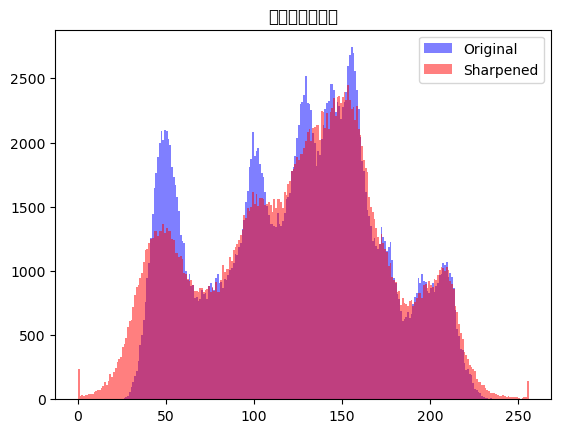

In [7]:
#直方图
plt.figure()
plt.hist(image.ravel(), 256, [0,256], color='b', alpha=0.5, label='Original')
plt.hist(sharpened_image.ravel(), 256, [0,256], color='r', alpha=0.5, label='Sharpened')
plt.legend()
plt.title("像素值分布变化")
plt.show()

In [15]:
# 手搓CNN，帮助理解CNN实现的工作机理

import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# 激活函数与损失函数
def relu(x):
    return np.maximum(0, x)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

def cross_entropy(y_pred, y_true):
    eps = 1e-12
    return -np.mean(y_true * np.log(y_pred + eps))

# ---------------------- 网络层定义 ----------------------
class Conv2D:
    def __init__(self, in_channels, out_channels, kernel_size=3):
        self.W = np.random.randn(kernel_size, kernel_size, in_channels, out_channels) * 0.1
        self.b = np.zeros(out_channels)
        self.cache = None  # 存储前向传播的输入

    def forward(self, X):
        """输入X形状: (batch, H, W, in_channels)"""
        self.cache = X
        batch, H, W, C_in = X.shape
        K, _, _, C_out = self.W.shape
        H_out = H - K + 1
        W_out = W - K + 1
        
        # 计算输出
        output = np.zeros((batch, H_out, W_out, C_out))
        for i in range(H_out):
            for j in range(W_out):
                region = X[:, i:i+K, j:j+K, :]  # (batch, K, K, C_in)
                output[:, i, j, :] = np.tensordot(region, self.W, axes=([1,2,3], [0,1,2])) + self.b
        return output

    def backward(self, dZ, lr=0.01):
        X = self.cache
        batch, H, W, C_in = X.shape
        K, _, _, C_out = self.W.shape
        
        dW = np.zeros_like(self.W)
        db = np.sum(dZ, axis=(0,1,2))  # 梯度累加
        
        # 计算输入梯度与权重梯度
        dX = np.zeros_like(X)
        for i in range(H - K + 1):
            for j in range(W - K + 1):
                region = X[:, i:i+K, j:j+K, :]  # (batch, K, K, C_in)
                dW += np.tensordot(region.transpose(1,2,3,0), dZ[:,i,j,:], axes=(-1, 0))
                dX[:, i:i+K, j:j+K, :] += np.tensordot(dZ[:,i,j,:], self.W, axes=(-1, -1))
        
        # 参数更新
        self.W -= lr * dW / batch
        self.b -= lr * db / batch
        return dX

class MaxPool2D:
    def __init__(self, pool_size=2):
        self.pool_size = pool_size
        self.cache = None

    def forward(self, X):
        """输入X形状: (batch, H, W, C)"""
        self.cache = X
        batch, H, W, C = X.shape
        H_out = H // self.pool_size
        W_out = W // self.pool_size
        
        # 重塑为 (batch, H_out, pool_size, W_out, pool_size, C)
        X_reshaped = X.reshape(batch, H_out, self.pool_size, W_out, self.pool_size, C)
        output = X_reshaped.max(axis=(2,4))
        return output

    def backward(self, dZ):
        X = self.cache
        batch, H, W, C = X.shape
        dX = np.zeros_like(X)
        
        for i in range(0, H, self.pool_size):
            for j in range(0, W, self.pool_size):
                region = X[:, i:i+self.pool_size, j:j+self.pool_size, :]
                max_val = np.max(region, axis=(1,2), keepdims=True)
                mask = (region == max_val)
                dX[:, i:i+self.pool_size, j:j+self.pool_size, :] += mask * dZ[:, i//self.pool_size, j//self.pool_size, :, np.newaxis, np.newaxis]
        return dX

class Flatten:
    def forward(self, X):
        self.input_shape = X.shape
        return X.reshape(X.shape[0], -1)

    def backward(self, dZ):
        return dZ.reshape(self.input_shape)

class Dense:
    def __init__(self, input_dim, output_dim):
        self.W = np.random.randn(input_dim, output_dim) * 0.1
        self.b = np.zeros(output_dim)
        self.cache = None

    def forward(self, X):
        self.cache = X
        return X @ self.W + self.b

    def backward(self, dZ, lr=0.01):
        X = self.cache
        dW = X.T @ dZ
        db = np.sum(dZ, axis=0)
        dX = dZ @ self.W.T
        
        # 参数更新
        self.W -= lr * dW / X.shape[0]
        self.b -= lr * db / X.shape[0]
        return dX

# ---------------------- CNN模型 ----------------------
class SimpleCNN:
    def __init__(self):
        self.layers = [
            Conv2D(in_channels=1, out_channels=8),
            lambda x: relu(x),  # ReLU激活
            MaxPool2D(pool_size=2),
            Conv2D(in_channels=8, out_channels=16),
            lambda x: relu(x),
            MaxPool2D(pool_size=2),
            Flatten(),
            Dense(input_dim=16*7*7, output_dim=10)
        ]

    def forward(self, X):
        for layer in self.layers:
            X = layer(X) if callable(layer) else layer.forward(X)
        return softmax(X)

    def backward(self, dZ, lr):
        gradients = dZ
        for layer in reversed(self.layers):
            if isinstance(layer, (Conv2D, Dense, MaxPool2D, Flatten)):
                gradients = layer.backward(gradients, lr) if isinstance(layer, (Conv2D, Dense)) else layer.backward(gradients)
        return gradients

# ---------------------- 数据加载与预处理 ----------------------
# 加载MNIST数据集
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X = mnist.data.reshape(-1, 28, 28, 1).astype(np.float32) / 255.0
y = OneHotEncoder(sparse=False).fit_transform(mnist.target.reshape(-1,1))

# 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---------------------- 训练流程 ----------------------
model = SimpleCNN()
batch_size = 64
lr = 0.01
epochs = 3

for epoch in range(epochs):
    epoch_loss = 0
    for i in range(0, len(X_train), batch_size):
        # 前向传播
        X_batch = X_train[i:i+batch_size]
        y_batch = y_train[i:i+batch_size]
        y_pred = model.forward(X_batch)
        
        # 计算损失与梯度
        loss = cross_entropy(y_pred, y_batch)
        epoch_loss += loss
        dZ = (y_pred - y_batch) / batch_size
        
        # 反向传播
        model.backward(dZ, lr)
    
    # 评估
    test_pred = model.forward(X_test)
    test_acc = np.mean(np.argmax(test_pred, axis=1) == np.argmax(y_test, axis=1))
    print(f"Epoch {epoch+1}, Loss: {epoch_loss/len(X_train):.4f}, Test Acc: {test_acc:.4f}")

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: cannot reshape array of size 123904 into shape (64,5,2,5,2,16)

Epoch 1/50 | Train Loss: 0.4988 | Test Loss: 0.4965
Epoch 2/50 | Train Loss: 0.4936 | Test Loss: 0.4900
Epoch 3/50 | Train Loss: 0.4844 | Test Loss: 0.4774
Epoch 4/50 | Train Loss: 0.4661 | Test Loss: 0.4520
Epoch 5/50 | Train Loss: 0.4306 | Test Loss: 0.4045
Epoch 6/50 | Train Loss: 0.3691 | Test Loss: 0.3293
Epoch 7/50 | Train Loss: 0.2853 | Test Loss: 0.2419
Epoch 8/50 | Train Loss: 0.2066 | Test Loss: 0.1768
Epoch 9/50 | Train Loss: 0.1583 | Test Loss: 0.1438
Epoch 10/50 | Train Loss: 0.1349 | Test Loss: 0.1274
Epoch 11/50 | Train Loss: 0.1219 | Test Loss: 0.1169
Epoch 12/50 | Train Loss: 0.1127 | Test Loss: 0.1088
Epoch 13/50 | Train Loss: 0.1053 | Test Loss: 0.1021
Epoch 14/50 | Train Loss: 0.0991 | Test Loss: 0.0964
Epoch 15/50 | Train Loss: 0.0938 | Test Loss: 0.0914
Epoch 16/50 | Train Loss: 0.0892 | Test Loss: 0.0871
Epoch 17/50 | Train Loss: 0.0851 | Test Loss: 0.0833
Epoch 18/50 | Train Loss: 0.0815 | Test Loss: 0.0799
Epoch 19/50 | Train Loss: 0.0783 | Test Loss: 0.0769
Ep

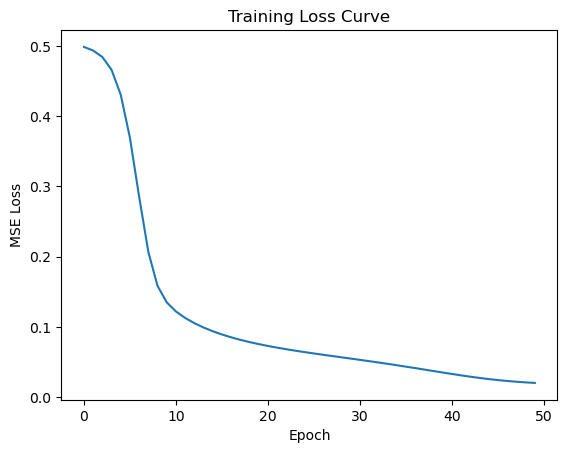

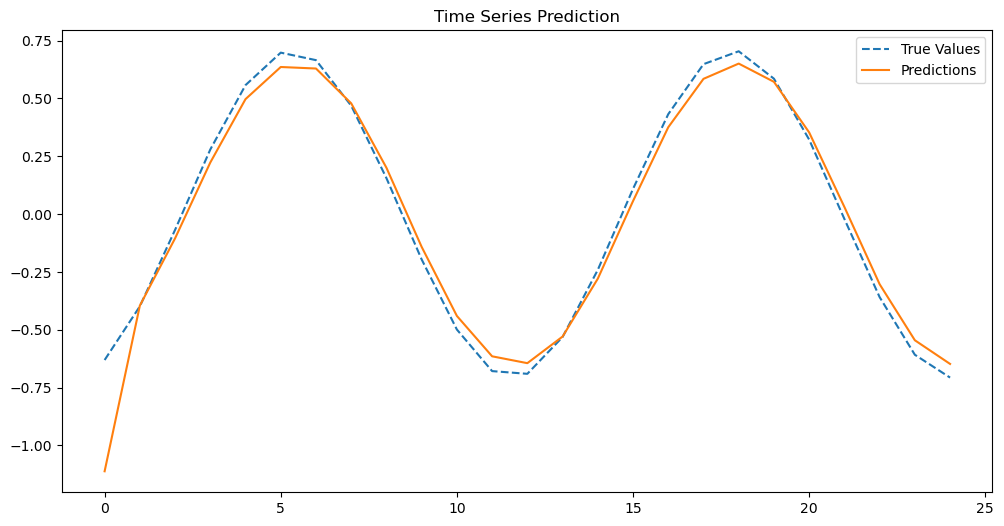

In [13]:
# numpy手搓RNN实例

import numpy as np
import matplotlib.pyplot as plt

# ---------------------- RNN模型定义 ----------------------
class SimpleRNN:
    def __init__(self, input_size, hidden_size, output_size):
        # 参数初始化
        self.Wxh = np.random.randn(input_size, hidden_size) * 0.01  # 输入到隐藏层权重
        self.Whh = np.random.randn(hidden_size, hidden_size) * 0.01  # 隐藏层到隐藏层权重
        self.Why = np.random.randn(hidden_size, output_size) * 0.01  # 隐藏层到输出层权重
        self.bh = np.zeros(hidden_size)                              # 隐藏层偏置
        self.by = np.zeros(output_size)                              # 输出层偏置
        self.hidden_size = hidden_size

    def forward(self, inputs):
        """前向传播：处理一个序列输入
        输入: inputs形状 (seq_length, input_size)
        返回: outputs形状 (seq_length, output_size), 隐藏状态序列
        """
        seq_length = inputs.shape[0]
        h_prev = np.zeros(self.hidden_size)  # 初始隐藏状态
        self.h_states = {}                   # 存储每个时间步的隐藏状态（反向传播需要）
        outputs = []

        for t in range(seq_length):
            # 计算当前隐藏状态
            h_current = np.tanh(inputs[t] @ self.Wxh + h_prev @ self.Whh + self.bh)
            # 计算当前输出
            y_current = h_current @ self.Why + self.by
            # 存储中间结果
            self.h_states[t] = (h_prev, h_current, inputs[t])
            h_prev = h_current
            outputs.append(y_current)

        return np.array(outputs), h_current

    def backward(self, dy, lr=0.01):
        """反向传播：通过时间反向传播（BPTT）
        输入: dy形状 (seq_length, output_size), 学习率lr
        """
        seq_length = dy.shape[0]
        # 初始化梯度
        dWxh, dWhh, dWhy = np.zeros_like(self.Wxh), np.zeros_like(self.Whh), np.zeros_like(self.Why)
        dbh, dby = np.zeros_like(self.bh), np.zeros_like(self.by)
        dh_next = np.zeros(self.hidden_size)  # 来自下一个时间步的梯度

        # 反向遍历时间步
        for t in reversed(range(seq_length)):
            h_prev, h_current, x_t = self.h_states[t]
            
            # 输出层梯度
            dWhy += np.outer(h_current, dy[t])
            dby += dy[t]
            dh = dy[t] @ self.Why.T + dh_next  # 合并来自输出和下一时间步的梯度
            
            # 通过tanh的梯度
            dh_raw = (1 - h_current**2) * dh
            
            # 计算参数梯度
            dWxh += np.outer(x_t, dh_raw)
            dWhh += np.outer(h_prev, dh_raw)
            dbh += dh_raw
            
            # 传递梯度到前一时间步
            dh_next = dh_raw @ self.Whh.T

        # 参数更新（简单SGD）
        self.Wxh -= lr * dWxh / seq_length
        self.Whh -= lr * dWhh / seq_length
        self.Why -= lr * dWhy / seq_length
        self.bh -= lr * dbh / seq_length
        self.by -= lr * dby / seq_length

# ---------------------- 数据生成 ----------------------
def generate_sine_wave(seq_length=100, n_samples=1000):
    """生成正弦波时间序列数据"""
    X, y = [], []
    for _ in range(n_samples):
        start = np.random.uniform(0, 2*np.pi)
        seq = np.sin(np.linspace(start, start + 4*np.pi, seq_length + 1))
        X.append(seq[:-1].reshape(-1, 1))  # 输入序列
        y.append(seq[1:].reshape(-1, 1))   # 输出序列（下一个时间步）
    return np.array(X), np.array(y)

# 生成数据
seq_length = 25
X, y = generate_sine_wave(seq_length=seq_length, n_samples=1000)

# 划分训练集/测试集
X_train, X_test = X[:800], X[800:]
y_train, y_test = y[:800], y[800:]

# 数据标准化
mean, std = X_train.mean(), X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

# ---------------------- 训练流程 ----------------------
# 超参数设置
input_size = 1
hidden_size = 32
output_size = 1
lr = 0.01
epochs = 50

# 初始化模型
rnn = SimpleRNN(input_size, hidden_size, output_size)

# 训练循环
train_losses = []
for epoch in range(epochs):
    epoch_loss = 0
    for i in range(len(X_train)):
        # 前向传播
        inputs = X_train[i]          # 形状 (seq_length, 1)
        targets = y_train[i]         # 形状 (seq_length, 1)
        outputs, _ = rnn.forward(inputs)
        
        # 计算损失（MSE）
        loss = np.mean((outputs - targets)**2)
        epoch_loss += loss
        
        # 反向传播
        dy = 2 * (outputs - targets) / seq_length  # MSE梯度
        rnn.backward(dy, lr=lr)
    
    # 验证
    test_loss = 0
    for i in range(len(X_test)):
        inputs = X_test[i]
        targets = y_test[i]
        outputs, _ = rnn.forward(inputs)
        test_loss += np.mean((outputs - targets)**2)
    
    train_loss = epoch_loss / len(X_train)
    test_loss = test_loss / len(X_test)
    train_losses.append(train_loss)
    print(f"Epoch {epoch+1}/{epochs} | Train Loss: {train_loss:.4f} | Test Loss: {test_loss:.4f}")

# 绘制训练曲线
plt.plot(train_losses)
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.title("Training Loss Curve")
plt.show()

# ---------------------- 预测可视化 ----------------------
# 选择一个测试样本
sample_idx = 0
inputs = X_test[sample_idx]
targets = y_test[sample_idx] * std + mean  # 反标准化
outputs, _ = rnn.forward(inputs)
outputs = outputs * std + mean

# 绘制结果
plt.figure(figsize=(12,6))
plt.plot(targets, label="True Values", linestyle="--")
plt.plot(outputs, label="Predictions")
plt.title("Time Series Prediction")
plt.legend()
plt.show()

In [16]:
# NLP 中的词袋模型与文本分类

import numpy as np
from sklearn.datasets import fetch_20newsgroups

# 加载20newsgroups数据集
categories = ['sci.med', 'comp.graphics']
newsgroups = fetch_20newsgroups(subset='train', categories=categories)
texts = newsgroups.data[:500]  # 取500篇文档
labels = newsgroups.target[:500]

# 构建词袋模型
vocab = {}
for text in texts:
    words = text.lower().split()  # 简单分词
    for word in words:
        if word not in vocab:
            vocab[word] = len(vocab)

# 创建文档-词矩阵
bow_matrix = np.zeros((len(texts), len(vocab)), dtype=int)
for i, text in enumerate(texts):
    words = text.lower().split()
    for word in words:
        if word in vocab:
            bow_matrix[i, vocab[word]] += 1

print(f"词袋矩阵形状: {bow_matrix.shape}")  # (500, 词汇表大小)

词袋矩阵形状: (500, 22468)


In [17]:
#tf-idf加与相似度计算

# 计算TF-IDF
term_freq = bow_matrix.astype(float)
doc_freq = (bow_matrix > 0).sum(axis=0)
idf = np.log(len(texts) / (doc_freq + 1))  # 平滑处理
tfidf = term_freq * idf

# 文档相似度计算（余弦相似度）
def cosine_sim(vec1, vec2):
    return np.dot(vec1, vec2) / (np.linalg.norm(vec1) * np.linalg.norm(vec2))

doc1 = tfidf[0]
doc2 = tfidf[1]
print(f"文档相似度: {cosine_sim(doc1, doc2):.4f}")

# 找到最相似文档
similarities = tfidf @ tfidf.T  # 矩阵快速计算
np.fill_diagonal(similarities, 0)  # 排除自身
most_similar = np.argmax(similarities, axis=1)

文档相似度: 0.0160


In [18]:
# 词嵌入的实现
# 构建共现矩阵
window_size = 2
vocab_list = list(vocab.keys())
cooccur = np.zeros((len(vocab), len(vocab)), dtype=int)

for text in texts:
    words = [vocab[w] for w in text.split() if w in vocab]
    for i, center_word in enumerate(words):
        context = words[max(0,i-window_size):i] + words[i+1:i+window_size+1]
        for context_word in context:
            cooccur[center_word, context_word] += 1

# 奇异值分解（SVD）降维
U, s, Vt = np.linalg.svd(cooccur, full_matrices=False)
word_vectors = U[:, :50]  # 取前50维作为词向量

# 查询相似词
def find_similar(word, topn=5):
    vec = word_vectors[vocab[word]]
    sims = word_vectors @ vec
    return [vocab_list[i] for i in np.argsort(-sims)[:topn]]

print("与'computer'相似的词:", find_similar('computer'))

MemoryError: Unable to allocate 3.76 GiB for an array with shape (22468, 22468) and data type float64

In [19]:
#文本情感分类
from nltk.corpus import movie_reviews
import numpy as np

# 加载电影评论数据
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# 构建特征矩阵（使用前2000高频词）
all_words = [word.lower() for words,_ in documents for word in words]
vocab = np.unique(all_words)[:2000]  # 取前2000个唯一词
vocab_dict = {word:i for i,word in enumerate(vocab)}

# 创建特征矩阵
X = np.zeros((len(documents), len(vocab)), dtype=int)
y = np.array([1 if cat=='pos' else 0 for (_,cat) in documents])
for i, (words,_) in enumerate(documents):
    for word in words:
        if word in vocab_dict:
            X[i, vocab_dict[word]] += 1

# 逻辑回归训练
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

W = np.random.randn(X.shape[1])
lr = 0.01
for _ in range(100):
    logits = X @ W
    preds = sigmoid(logits)
    grad = X.T @ (preds - y)  # 交叉熵梯度
    W -= lr * grad

# 评估准确率

test_preds = (sigmoid(X @ W) > 0.5).astype(int)
accuracy = np.mean(test_preds == y)
print(f"训练准确率: {accuracy:.4f}")

LookupError: 
**********************************************************************
  Resource [93mmovie_reviews[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('movie_reviews')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/movie_reviews[0m

  Searched in:
    - 'C:\\Users\\Administrator/nltk_data'
    - 'c:\\ProgramData\\anaconda3\\nltk_data'
    - 'c:\\ProgramData\\anaconda3\\share\\nltk_data'
    - 'c:\\ProgramData\\anaconda3\\lib\\nltk_data'
    - 'C:\\Users\\Administrator\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [20]:
#N-gram语言模型
from collections import defaultdict

# 构建三元模型
n = 3
counts = defaultdict(lambda: defaultdict(int))

for _, words in documents:
    padded = ['<s>']*(n-1) + words + ['</s>']
    for i in range(len(padded)-n+1):
        ngram = tuple(padded[i:i+n])
        prefix, target = ngram[:-1], ngram[-1]
        counts[prefix][target] += 1

# 转换为概率矩阵
def get_prob_matrix(context):
    total = sum(counts[context].values())
    return {word: count/total for word, count in counts[context].items()}

# 预测下一个词
context = ('this', 'movie')
probs = get_prob_matrix(context)
top_words = sorted(probs.items(), key=lambda x: -x[1])[:3]
print(f"'{' '.join(context)}' 的下一个可能词:", top_words)

NameError: name 'documents' is not defined

In [21]:
# 词向量投影
from sklearn.decomposition import PCA

# 随机选择50个词的向量
words = ['computer', 'software', 'data', 'health', 'medical', 'disease']
indices = [vocab[w] for w in words]
vectors = word_vectors[indices]

# PCA降维可视化
pca = PCA(n_components=2)
projected = pca.fit_transform(vectors)

plt.figure(figsize=(10,6))
for i, word in enumerate(words):
    plt.scatter(projected[i,0], projected[i,1], marker='$'+word+'$', s=1000)
plt.title("词向量二维投影")
plt.show()

NameError: name 'word_vectors' is not defined